# 3: Regression Modelling

The Ridge, Lasso, and ElasticNet models will all be run against eachother for each dataset. The code is currently set up to give results for the Sydney dataset.

Anywhere there's a "df_", that value must be changed to the dataframe you're trying to conduct analysis for.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, RidgeCV, LassoCV, ElasticNetCV
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb
from sklearn.model_selection import GridSearchCV 

In [2]:
path_tor = ('Toronto_listings.csv') #Toronto Data
path_van = ('Vancouver_listings.csv') #Vancouver Data
path_mtl = ('Montreal_listings.csv') #Montreal Data
path_bar = ('Barcelona_listings.csv') #Barcelona Data
path_la = ('LA_listings.csv') #LA Data
path_chi = ('Chicago_listings.csv') #Chicago Data
path_sto = ('Stockholm_listings.csv') #Stockholm Data
path_syd = ('Sydney_listings.csv') #Sydney Data
df_tor = pd.read_csv(path_tor, header=0, index_col=0)
df_van = pd.read_csv(path_van, header=0, index_col=0)
df_mtl = pd.read_csv(path_mtl, header=0, index_col=0)
df_bar = pd.read_csv(path_bar, header=0, index_col=0)
df_la = pd.read_csv(path_la, header=0, index_col=0)
df_chi = pd.read_csv(path_chi, header=0, index_col=0)
df_sto = pd.read_csv(path_sto, header=0, index_col=0)
df_syd = pd.read_csv(path_syd, header=0, index_col=0)

In [3]:
# Remove where Toronto prices > 300
condition = df_tor[df_tor['price'] > 300]
rows_to_drop = condition.index
print("Toronto dataset dropped {} rows.".format(condition.shape[0]))
df_tor = df_tor.drop(rows_to_drop, axis=0)
# Remove where Montreal prices > 250
condition = df_mtl[df_mtl['price'] > 250]
rows_to_drop = condition.index
print("Montreal dataset dropped {} rows.".format(condition.shape[0]))
df_mtl = df_mtl.drop(rows_to_drop, axis=0)
# Remove where Vancouver prices > 350
condition = df_van[df_van['price'] > 350]
rows_to_drop = condition.index
print("Vancouver dataset dropped {} rows.".format(condition.shape[0]))
df_van = df_van.drop(rows_to_drop, axis=0)
# Remove where Barcelona prices > 320
condition = df_bar[df_bar['price'] > 320]
rows_to_drop = condition.index
print("Barcelona dataset dropped {} rows.".format(condition.shape[0]))
df_bar = df_bar.drop(rows_to_drop, axis=0)
# Remove where Chicago prices > 450
condition = df_chi[df_chi['price'] > 450]
rows_to_drop = condition.index
print("Chicago dataset dropped {} rows.".format(condition.shape[0]))
df_chi = df_chi.drop(rows_to_drop, axis=0)
# Remove where LA prices > 600
condition = df_la[df_la['price'] > 600]
rows_to_drop = condition.index
print("LA dataset dropped {} rows.".format(condition.shape[0]))
df_la = df_la.drop(rows_to_drop, axis=0)
# Remove where Stockholm prices > 400
condition = df_sto[df_sto['price'] > 400]
rows_to_drop = condition.index
print("Stockholm dataset dropped {} rows.".format(condition.shape[0]))
df_sto = df_sto.drop(rows_to_drop, axis=0)
# Remove where Sydney prices > 650
condition = df_syd[df_syd['price'] > 650]
rows_to_drop = condition.index
print("Sydney dataset dropped {} rows.".format(condition.shape[0]))
df_syd = df_syd.drop(rows_to_drop, axis=0)

Toronto dataset dropped 848 rows.
Montreal dataset dropped 742 rows.
Vancouver dataset dropped 274 rows.
Barcelona dataset dropped 809 rows.
Chicago dataset dropped 457 rows.
LA dataset dropped 2764 rows.
Stockholm dataset dropped 134 rows.
Sydney dataset dropped 804 rows.


**Before Standarization**

In [4]:
df_syd.info() #Change df based on dataset

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6629 entries, 14250 to 54188416
Data columns (total 37 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   description                  6629 non-null   object 
 1   host_id                      6629 non-null   int64  
 2   host_location                6625 non-null   object 
 3   host_response_time           5901 non-null   object 
 4   host_response_rate           5901 non-null   object 
 5   host_acceptance_rate         6000 non-null   object 
 6   host_is_superhost            6629 non-null   object 
 7   host_total_listings_count    6629 non-null   int64  
 8   neighbourhood                6629 non-null   object 
 9   latitude                     6629 non-null   float64
 10  longitude                    6629 non-null   float64
 11  property_type                6629 non-null   object 
 12  room_type                    6629 non-null   object 
 13  accommodat

Next, I dropped all variables which didn't have any effect on the price

In [5]:
df_syd = df_syd.drop(['description','host_id','property_type', 'host_location','host_is_superhost', 'host_response_time','host_response_rate','host_acceptance_rate','host_total_listings_count','amenities','Accomodation Bin','private_shared','bathrooms_text'], axis=1)
df_syd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6629 entries, 14250 to 54188416
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   neighbourhood                6629 non-null   object 
 1   latitude                     6629 non-null   float64
 2   longitude                    6629 non-null   float64
 3   room_type                    6629 non-null   object 
 4   accommodates                 6629 non-null   int64  
 5   bathrooms                    6621 non-null   float64
 6   bedrooms                     5931 non-null   float64
 7   beds                         6536 non-null   float64
 8   price                        6629 non-null   float64
 9   minimum_nights               6629 non-null   int64  
 10  maximum_nights               6629 non-null   int64  
 11  availability_30              6629 non-null   int64  
 12  availability_60              6629 non-null   int64  
 13  availabili

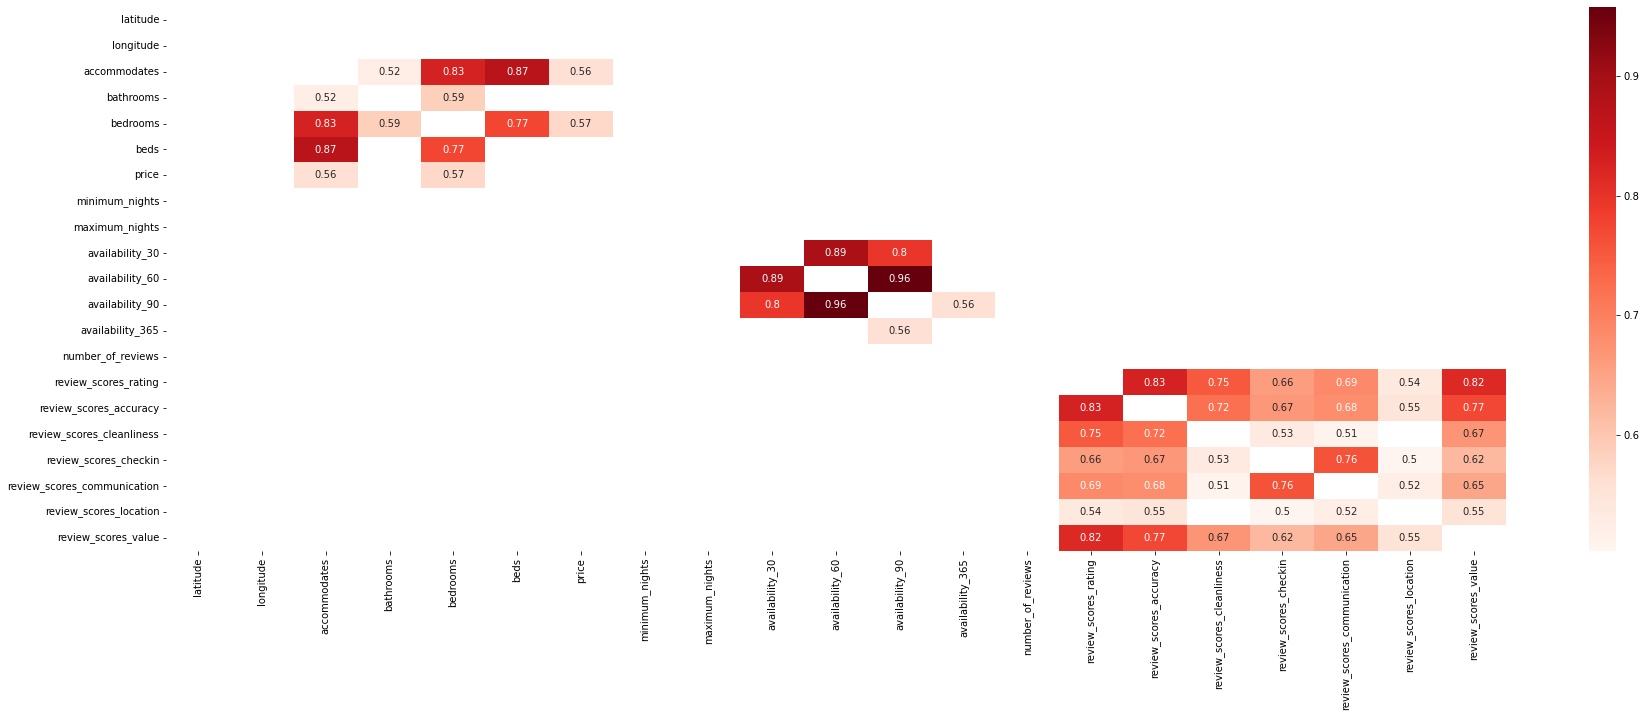

In [6]:
dfCorr = df_syd.corr() #Correlation Matrix
filteredDf = dfCorr[((dfCorr >= .5) | (dfCorr <= -.5)) & (dfCorr !=1.000)] #only show Correlations that are above or below 0.5
plt.figure(figsize=(30,10))
sns.heatmap(filteredDf, annot=True, cmap="Reds")
plt.show()

In [7]:
df_syd['bathrooms'] = df_syd['bathrooms'].fillna(df_syd['bathrooms'].median())
df_syd['bedrooms'] = df_syd['bedrooms'].fillna(df_syd['bedrooms'].median())
df_syd['beds'] = df_syd['beds'].fillna(df_syd['beds'].mean())
df_syd['review_scores_rating'] = df_syd['review_scores_rating'].fillna(df_syd['review_scores_rating'].median())
df_syd['review_scores_accuracy'] =df_syd['review_scores_accuracy'].fillna(df_syd['review_scores_accuracy'].median())
df_syd['review_scores_cleanliness'] = df_syd['review_scores_cleanliness'].fillna(df_syd['review_scores_cleanliness'].median())
df_syd['review_scores_checkin'] = df_syd['review_scores_checkin'].fillna(df_syd['review_scores_checkin'].median())
df_syd['review_scores_communication'] = df_syd['review_scores_communication'].fillna(df_syd['review_scores_communication'].median())
df_syd['review_scores_location'] = df_syd['review_scores_location'].fillna(df_syd['review_scores_location'].median())
df_syd['review_scores_value'] = df_syd['review_scores_value'].fillna(df_syd['review_scores_value'].median())

df_syd.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 6629 entries, 14250 to 54188416
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   neighbourhood                6629 non-null   object 
 1   latitude                     6629 non-null   float64
 2   longitude                    6629 non-null   float64
 3   room_type                    6629 non-null   object 
 4   accommodates                 6629 non-null   int64  
 5   bathrooms                    6629 non-null   float64
 6   bedrooms                     6629 non-null   float64
 7   beds                         6629 non-null   float64
 8   price                        6629 non-null   float64
 9   minimum_nights               6629 non-null   int64  
 10  maximum_nights               6629 non-null   int64  
 11  availability_30              6629 non-null   int64  
 12  availability_60              6629 non-null   int64  
 13  availabili

In [8]:
data = pd.get_dummies(df_syd) #Using One-Hot Encoding for categorical variables: Neighbourhood & room_type
data.head()

,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,maximum_nights,availability_30,...,neighbourhood_Warringah,neighbourhood_Waverley,neighbourhood_Willoughby,neighbourhood_Woollahra,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room,instant_bookable_f,instant_bookable_t
id,,,,,,,,,,,,,,,,,,,,,
14250,-33.80093,151.26172,6,3.0,3.0,3.0,427.34,2,22,0,...,0,0,0,0,1,0,0,0,1,0
15253,-33.87964,151.21680,2,1.0,1.0,1.0,80.01,2,90,17,...,0,0,0,0,0,0,1,0,0,1
58506,-33.81927,151.23652,4,1.0,1.0,1.0,136.39,2,90,6,...,0,0,0,0,1,0,0,0,1,0
68999,-33.72966,151.05226,4,3.0,2.0,3.0,80.92,1,30,23,...,0,0,0,0,0,0,1,0,1,0
71866,-33.90860,151.25185,6,1.0,2.0,3.0,182.76,3,300,3,...,0,0,0,0,1,0,0,0,1,0


In [9]:
X = data.copy().drop('price', axis = 1)
y = data['price'].copy() #Price is the target variable

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y) #Splitting data into test/train datasets
scaler = StandardScaler() #Scale data to have similar dimensions
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train) 
X_test_scaled = scaler.transform(X_test)

In [11]:
baseline = y_train.mean() #average of training data
print('Using the average, the average price of an Air Bnb costs: ' + str(baseline))
baseline_error = np.sqrt(mean_squared_error(y_pred=np.ones_like(y_test) * baseline, y_true=y_test))
print('with an error rate of +- ' + str(baseline_error))

Using the average, the average price of an Air Bnb costs: 202.58612552806318
with an error rate of +- 136.68243014379806


In [12]:
lr = LinearRegression() #Trying all these alphas, l1 values to get the best one
alphas = [1000, 100, 50, 20, 10, 1, 0.1, 0.01]
l1_ratios = [0.001, 0.01, 0.05, 0.1, 0.3, 0.5, 0.7, 0.9]
ridge = RidgeCV(alphas=alphas)
lasso = LassoCV(alphas=alphas, max_iter=10000)
elastic = ElasticNetCV(alphas=alphas, l1_ratio=l1_ratios)

In [13]:
n =y_test.shape[0]
p = 23
for model, name in zip([ridge, lasso, elastic], ['Ridge', 'Lasso', 'ElasticNet']):
    model.fit(X_train_scaled, y_train)
    y_pred_train = model.predict(X_train_scaled)
    y_pred = model.predict(X_test_scaled)
    mse_test = mean_squared_error(y_pred=y_pred, y_true=y_test)
    rmse_test = np.sqrt(mean_squared_error(y_pred=y_pred, y_true=y_test))
    r2 = r2_score(y_pred=y_pred, y_true=y_test)
    adj_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    print(name + ': rmse:' + str(rmse_test) +  ': mse:' + str(mse_test) + ', r2: ' + str(r2) + ', adjusted r2: ' + str(adj_r2))

Ridge: rmse:90.11807446312677: mse:8121.2673449416625, r2: 0.5652795429527318, adjusted r2: 0.5591604667519441
Lasso: rmse:90.10567625289498: mse:8119.032892991521, r2: 0.5653991501435502, adjusted r2: 0.5592817575201119
ElasticNet: rmse:90.12071938832938: mse:8121.744063070007, r2: 0.5652540248760776, adjusted r2: 0.5591345894857164


C:\Users\conno\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9212.921243626624, tolerance: 7276.466571944696
  model = cd_fast.enet_coordinate_descent_gram(


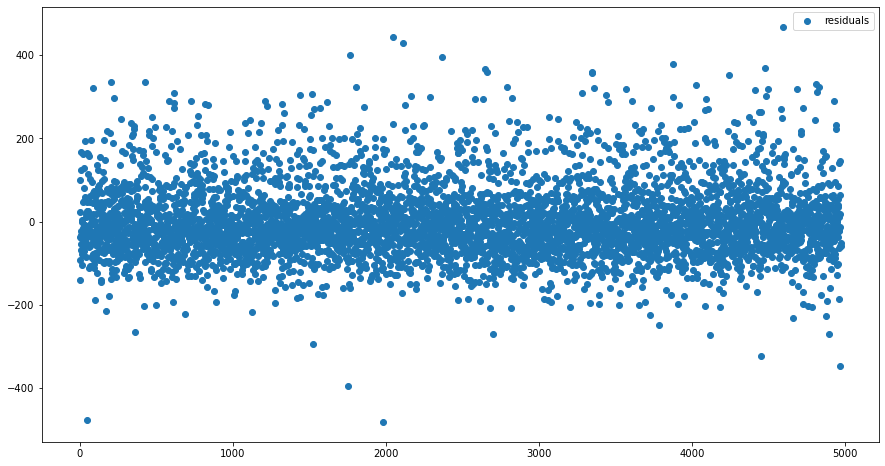

In [14]:
y_pred_train = lasso.predict(X_train_scaled) #Plotting Lasso residuals
diff = y_train - y_pred_train
plt.figure(figsize=(15,8))
plt.scatter(np.arange(len(diff)), diff, label = 'residuals')
plt.legend()
#The Residual plot shows a fairly random pattern

**After Standardization**

Based on the correlation matrix, want to test out dropping some of the other highly correlated values to see if it would improve model performance

In [15]:
df_syd = df_syd.drop(['review_scores_location','review_scores_communication','review_scores_checkin','review_scores_cleanliness','review_scores_accuracy','beds','review_scores_value','availability_30','availability_60','availability_90'], axis=1)
df_syd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6629 entries, 14250 to 54188416
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   neighbourhood         6629 non-null   object 
 1   latitude              6629 non-null   float64
 2   longitude             6629 non-null   float64
 3   room_type             6629 non-null   object 
 4   accommodates          6629 non-null   int64  
 5   bathrooms             6629 non-null   float64
 6   bedrooms              6629 non-null   float64
 7   price                 6629 non-null   float64
 8   minimum_nights        6629 non-null   int64  
 9   maximum_nights        6629 non-null   int64  
 10  availability_365      6629 non-null   int64  
 11  number_of_reviews     6629 non-null   int64  
 12  review_scores_rating  6629 non-null   float64
 13  instant_bookable      6629 non-null   object 
dtypes: float64(6), int64(5), object(3)
memory usage: 776.8+ KB


In [16]:
data = pd.get_dummies(df_syd) #Using One-Hot Encoding for categorical variables: Neighbourhood & room_type
X = data.copy().drop('price', axis = 1)
y = data['price'].copy() #Price is the target variable
X_train, X_test, y_train, y_test = train_test_split(X, y) #Splitting data into test/train datasets
scaler = StandardScaler() #Scale data to have similar dimensions
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train) 
X_test_scaled = scaler.transform(X_test)

In [17]:
lr = LinearRegression() #Trying al these alphas, l1 values to get the best one
alphas = [1000, 100, 50, 20, 10, 1, 0.1, 0.01]
l1_ratios = [0.001, 0.01, 0.05, 0.1, 0.3, 0.5, 0.7, 0.9]
ridge = RidgeCV(alphas=alphas)
lasso = LassoCV(alphas=alphas, max_iter=10000, cv = 3) # Change CV value for k-fold cross validation. Default value is 5.
elastic = ElasticNetCV(alphas=alphas, l1_ratio=l1_ratios)

In [18]:
n =y_test.shape[0]
p = 5
for model, name in zip([ridge, lasso, elastic], ['Ridge', 'Lasso', 'ElasticNet']):
    model.fit(X_train_scaled, y_train)
    y_pred_train = model.predict(X_train_scaled)
    y_pred = model.predict(X_test_scaled)
    mse_test = mean_squared_error(y_pred=y_pred, y_true=y_test)
    rmse_test = np.sqrt(mean_squared_error(y_pred=y_pred, y_true=y_test))
    r2 = r2_score(y_pred=y_pred, y_true=y_test)
    adj_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    print(name + ': rmse:' + str(rmse_test) +  ': mse:' + str(mse_test) + ', r2: ' + str(r2) + ', adjusted r2: ' + str(adj_r2))

Ridge: rmse:92.16119180587773: mse:8493.685275079784, r2: 0.539001003379153, adjusted r2: 0.5376057279656516
Lasso: rmse:92.15522241995865: mse:8492.585019272048, r2: 0.539060720310846, adjusted r2: 0.5376656256386634
ElasticNet: rmse:92.17611195672058: mse:8496.435615457885, r2: 0.5388517272859605, adjusted r2: 0.5374560000683031


C:\Users\conno\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10582.4898753725, tolerance: 7237.137095938008
  model = cd_fast.enet_coordinate_descent_gram(


Unfortunately, the RMSE and R^2 values don't improve after standardization.

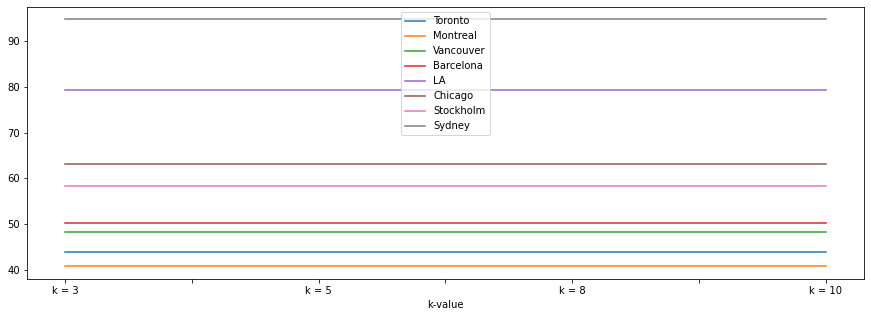

In [19]:
path_RMSE3 = ('RegressionRMSE.csv') 
df_trainRMSE = pd.read_csv(path_RMSE3, header=0, index_col=0)
ax = df_trainRMSE.plot.line(figsize=(15, 5))